# Tarea Semanal N3
A partir de la siguiente plantilla, sabiendo que:
<div>
<img src="img/plantilla.PNG" alt="Drawing" style="width: 400px;"/>
</div>
$$ \alpha_{max}=1 $$
$$ \alpha_{min}=35 $$
$$ f_{p}=3500 $$
$$ f_{s}=1000 $$

1. Obtener polos y ceros para máxima planicidad en la banda de paso.
2. Implementar el circuito con estructuras pasivas adaptadas mediante buffers.
3. Utilizando una norma de impedancia ZN = 1K, obtenga el valor de los componentes.
4. Active las bobinas utilizando una estructura con OPAMPs.

Para comenzar con la resolución, normalizo la plantilla:

In [4]:
alfa_max = 1
alfa_min = 35
fp = 3500
fs = 1000
norma_w = 3500

fp = fp/norma_w
fs = fs/norma_w

print("fp normalizada: {}".format(fp))
print("fs normalizada: {:.4f}".format(fs))

fp normalizada: 1.0
fs normalizada: 0.2857


A continuación, aplico la transformación a pasabajos: $k(s)=\frac{1}{s}$

In [7]:
fp = 1/fp
fs = 1/fs

print("fp pasabajos: {}".format(fp))
print("fs pasabajos: {}".format(fs))

fp pasabajos: 1.0
fs pasabajos: 3.5


Ya teniendo la plantilla pasabajos, puedo calcular $\varepsilon$ y el orden del filtro:

In [9]:
import numpy as np

epsilon_2 = 10**(alfa_max/10)-1
epsilon = np.sqrt(epsilon_2)
n = np.ceil(np.arccosh((np.sqrt(np.power(10, alfa_min * 0.1)) - 1) / epsilon_2) / (np.arccosh(fs)))

print('Epsilon: {:.4f}'.format(epsilon))
print('Epsilon al cuadrado: {:.4f}'.format(epsilon_2))
print('Orden del filtro: {:0.0f}'.format(n))

Epsilon: 0.5088
Epsilon al cuadrado: 0.2589
Orden del filtro: 4


Para la obtención del diagrama de polos y ceros, planteamos la transferencia para un filtro genérico de máxima planicidad de orden 4:
$$ \lvert T(jw)\rvert^2=\frac{1}{1+\varepsilon^2w^8} $$

(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

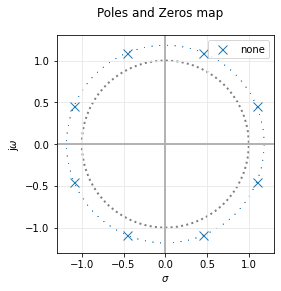

In [38]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt


my_tf = TransferFunction( [1], [epsilon_2, 0, 0, 0, 0, 0, 0, 0, 1] )

pzmap(my_tf)

Para máxima planicidad orden 4, la transferencia normalizada prototipo pasabajos a 3dB es:
$$ \lvert T(s)\rvert=\frac{1}{s^2+s.2.cos(\frac{\pi}{8})+1}\frac{1}{s^2+s.2.cos(\frac{3\pi}{8})+1}$$

Aplicando el núcleo de transformación $k(s)=\frac{1}{s}$ obtenemos la transferencia normalizada pasaaltos a 3dB:
$$ \lvert T(s)\rvert=\frac{s^2}{s^2+s.2.cos(\frac{\pi}{8})+1}\frac{s^2}{s^2+s.2.cos(\frac{3\pi}{8})+1}$$

Sin embargo, se debe tener en cuenta que estas son las transferencias a 3dB (Butterworth). Para ello, debemos calcular la $\omega$ de Butterworth:

In [10]:
omega_b = fp*epsilon**(-1/n)
print("Omega de Butterworth: {:.4f}".format(omega_b))

Omega de Butterworth: 1.1840


Se plantea resolver el circuito mediante estructuras pasivas:
<div>
<img src="img/pasiva.PNG" alt="Drawing" style="width: 400px;"/>
</div>

Con esta red puedo obtener las secciones de 2° orden deseadas:
$$ \lvert T(s)\rvert=\frac{k_1s^2}{s^2+s.2.cos(\frac{\pi}{8})+1}\frac{k_2s^2}{s^2+s.2.cos(\frac{3\pi}{8})+1}$$

Calculando los parámetros de las SOS:

In [31]:
wo1_2 = 1
wo1_q = 2*np.cos(np.pi/8)

wo1 = np.sqrt(wo1_2)
q1 = wo1/wo1_q
k1 = 1

print('Parametros del 1er filtro:')
print('Wo1={:.4f} - Q1={:.4f} - k1={:.4f}'.format(wo1, q1, k1))

l1 = q1/wo1
c1 = 1/(wo1*q1)
r1 = 1

print()
print('Componentes normalizados del 1er filtro:')
print('L1={:.4f} - C1={:.4f} - R1={:.4f}'.format(l1, c1, r1))

Parametros del 1er filtro:
Wo1=1.0000 - Q1=0.5412 - k1=1.0000

Componentes normalizados del 1er filtro:
L1=0.5412 - C1=1.8478 - R1=1.0000


In [35]:
wo2_2 = 1
wo2_q = 2*np.cos(3*np.pi/8)

wo2 = np.sqrt(wo2_2)
q2 = wo2/wo2_q
k2 = 1

print('Parametros del 2do filtro:')
print('Wo2={:.4f} - Q2={:.4f} - k2={:.4f}'.format(wo2, q2, k2))

l2 = q2/wo2
c2 = 1/(wo2*q2)
r2 = 1

print()
print('Componentes normalizados del 2do filtro:')
print('L2={:.4f} - C2={:.4f} - R2={:.4f}'.format(l2, c2, r2))

Parametros del 2do filtro:
Wo2=1.0000 - Q2=1.3066 - k2=1.0000

Componentes normalizados del 2do filtro:
L2=1.3066 - C2=0.7654 - R2=1.0000


Para la desnormalización de los componentes de los filtros debo calcular el $\omega$ de Butterworth para el circuito pasaaltos ya que debe ser afectado por el núcleo de transformación:

In [24]:
omega_b = (1/fp)*epsilon**(1/n)
print("Omega de Butterworth: {:.4f}".format(omega_b))

Omega de Butterworth: 0.8446


In [32]:
norma_z = 10e3
norma_w = omega_b*2*np.pi*3500

l1 = (l1*norma_z)/norma_w
c1 = c1/(norma_z*norma_w)
r1 = r1*norma_z

print('Componentes del 1er filtro:')
print('L1={:.4f} Hy - C1={:.3e} F - R1={:.4e} Ohm'.format(l1, c1, r1))

Componentes del 1er filtro:
L1=0.2914 Hy - C1=9.948e-09 F - R1=1.0000e+04 Ohm


In [36]:
l2 = (l2*norma_z)/norma_w
c2 = c2/(norma_z*norma_w)
r2 = r2*norma_z

print('Componentes del 2do filtro:')
print('L2={:.4f} Hy - C2={:.3e} F - R2={:.4e} Ohm'.format(l2, c2, r2))

Componentes del 2do filtro:
L2=0.7035 Hy - C2=4.121e-09 F - R2=1.0000e+04 Ohm


Para la verificación, se realizó la siguiente simulación en LTSpice:

<div>
<img src="img/circuito.PNG" alt="Drawing" style="width: 800px;"/>
</div>

A lo cual se obtuvieron los siguientes resultados:

<div>
<img src="img/simulacion.PNG" alt="Drawing" style="width: 800px;"/>
</div>

Los inductores pueden ser activados mediante la siguiente estructura:
<div>
<img src="img/activador.PNG" alt="Drawing" style="width: 800px;"/>
</div>

Conociendo los valores de inductancia deseados, calculamos los valores de los componentes que permiten la activación de los inductores: $Leq=R^2.C$

In [39]:
c = 1e-9

r_l1 = np.sqrt(l1/c)
r_l2 = np.sqrt(l2/c)

print('En todos los casos usamos C={:.0e}'.format(c))
print('Resistencias para activar inductor 1: R={:.3e}'.format(r_l1))
print('Resistencias para activar inductor 2: R={:.3e}'.format(r_l2))

En todos los casos usamos C=1e-09
Resistencias para activar inductor 1: R=1.707e+04
Resistencias para activar inductor 2: R=2.652e+04


Para la verificación, se realizó la siguiente simulación en LTSpice:

<div>
<img src="img/circuito-activado.PNG" alt="Drawing" style="width: 800px;"/>
</div>

A lo cual se obtuvieron los siguientes resultados:

<div>
<img src="img/simulacion-activado.PNG" alt="Drawing" style="width: 800px;"/>
</div>